## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.113652  0.628330  0.307535  1.007032 -0.053306 -0.285256
1 -1.254990 -1.214996 -0.577374  0.698515 -0.914872 -0.965626
2 -1.126768  0.094799  0.862537  0.541201 -1.558421 -1.029773
3  0.755214  0.659371  1.576143  0.412672  0.949442  1.592323
4 -1.299133 -0.021652 -1.053624 -1.734411 -0.699745 -1.657662


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0122973	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9997389	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9895985	total: 59ms	remaining: 19.6s
3:	learn: 0.9799302	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9701700	total: 60.1ms	remaining: 12s
5:	learn: 0.9590664	total: 60.6ms	remaining: 10s
6:	learn: 0.9473633	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9355596	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9268028	total: 62.4ms	remaining: 6.87s
9:	learn: 0.9159951	total: 63ms	remaining: 6.23s
10:	learn: 0.9066709	total: 63.5ms	remaining: 5.71s
11:	learn: 0.8955450	total: 64ms	remaining: 5.27s
12:	learn: 0.8853138	total: 64.6ms	remaining: 4.9s
13:	learn: 0.8768203	total: 65.1ms	remaining: 4.58s
14:	learn: 0.8682354	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8592301	total: 66ms	remaining: 4.06s
16:	learn: 0.8512160	total: 66.4ms	remaining: 3.84s
17:	learn: 0.8427376	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8346138	total: 67.5ms	remaining: 3.49s
19:	le

101:	learn: 0.4054424	total: 106ms	remaining: 929ms
102:	learn: 0.4025087	total: 106ms	remaining: 925ms
103:	learn: 0.3991065	total: 107ms	remaining: 919ms
104:	learn: 0.3964349	total: 107ms	remaining: 914ms
105:	learn: 0.3934905	total: 108ms	remaining: 909ms
106:	learn: 0.3903742	total: 108ms	remaining: 904ms
107:	learn: 0.3871977	total: 109ms	remaining: 898ms
108:	learn: 0.3846072	total: 109ms	remaining: 893ms
109:	learn: 0.3817860	total: 110ms	remaining: 887ms
110:	learn: 0.3794076	total: 110ms	remaining: 883ms
111:	learn: 0.3763139	total: 111ms	remaining: 879ms
112:	learn: 0.3735735	total: 111ms	remaining: 874ms
113:	learn: 0.3707823	total: 112ms	remaining: 869ms
114:	learn: 0.3678065	total: 112ms	remaining: 863ms
115:	learn: 0.3646725	total: 113ms	remaining: 859ms
116:	learn: 0.3618372	total: 113ms	remaining: 855ms
117:	learn: 0.3589977	total: 114ms	remaining: 851ms
118:	learn: 0.3567835	total: 114ms	remaining: 846ms
119:	learn: 0.3542253	total: 115ms	remaining: 841ms
120:	learn: 

268:	learn: 0.1359801	total: 186ms	remaining: 507ms
269:	learn: 0.1353037	total: 187ms	remaining: 506ms
270:	learn: 0.1343469	total: 187ms	remaining: 504ms
271:	learn: 0.1337117	total: 188ms	remaining: 503ms
272:	learn: 0.1329612	total: 188ms	remaining: 501ms
273:	learn: 0.1319881	total: 189ms	remaining: 500ms
274:	learn: 0.1312795	total: 189ms	remaining: 499ms
275:	learn: 0.1306631	total: 190ms	remaining: 498ms
276:	learn: 0.1299046	total: 191ms	remaining: 497ms
277:	learn: 0.1292289	total: 191ms	remaining: 496ms
278:	learn: 0.1281659	total: 192ms	remaining: 495ms
279:	learn: 0.1274343	total: 192ms	remaining: 494ms
280:	learn: 0.1266199	total: 193ms	remaining: 493ms
281:	learn: 0.1259076	total: 193ms	remaining: 492ms
282:	learn: 0.1249985	total: 194ms	remaining: 490ms
283:	learn: 0.1241718	total: 194ms	remaining: 490ms
284:	learn: 0.1234813	total: 195ms	remaining: 489ms
285:	learn: 0.1226693	total: 195ms	remaining: 488ms
286:	learn: 0.1219024	total: 196ms	remaining: 486ms
287:	learn: 

474:	learn: 0.0464730	total: 289ms	remaining: 319ms
475:	learn: 0.0462913	total: 289ms	remaining: 319ms
476:	learn: 0.0460975	total: 290ms	remaining: 318ms
477:	learn: 0.0459213	total: 290ms	remaining: 317ms
478:	learn: 0.0457502	total: 291ms	remaining: 316ms
479:	learn: 0.0455615	total: 291ms	remaining: 315ms
480:	learn: 0.0452831	total: 292ms	remaining: 315ms
481:	learn: 0.0451181	total: 292ms	remaining: 314ms
482:	learn: 0.0449957	total: 293ms	remaining: 313ms
483:	learn: 0.0448137	total: 293ms	remaining: 313ms
484:	learn: 0.0445413	total: 294ms	remaining: 312ms
485:	learn: 0.0443842	total: 294ms	remaining: 311ms
486:	learn: 0.0442670	total: 295ms	remaining: 310ms
487:	learn: 0.0440026	total: 295ms	remaining: 310ms
488:	learn: 0.0438833	total: 295ms	remaining: 309ms
489:	learn: 0.0437090	total: 296ms	remaining: 308ms
490:	learn: 0.0434520	total: 296ms	remaining: 307ms
491:	learn: 0.0433618	total: 297ms	remaining: 307ms
492:	learn: 0.0431111	total: 297ms	remaining: 306ms
493:	learn: 

642:	learn: 0.0235391	total: 370ms	remaining: 205ms
643:	learn: 0.0234666	total: 371ms	remaining: 205ms
644:	learn: 0.0234220	total: 371ms	remaining: 204ms
645:	learn: 0.0233780	total: 372ms	remaining: 204ms
646:	learn: 0.0233515	total: 372ms	remaining: 203ms
647:	learn: 0.0232272	total: 373ms	remaining: 202ms
648:	learn: 0.0231794	total: 373ms	remaining: 202ms
649:	learn: 0.0231363	total: 374ms	remaining: 201ms
650:	learn: 0.0229914	total: 374ms	remaining: 200ms
651:	learn: 0.0228634	total: 374ms	remaining: 200ms
652:	learn: 0.0228188	total: 375ms	remaining: 199ms
653:	learn: 0.0227768	total: 375ms	remaining: 199ms
654:	learn: 0.0227475	total: 376ms	remaining: 198ms
655:	learn: 0.0226193	total: 376ms	remaining: 197ms
656:	learn: 0.0225274	total: 377ms	remaining: 197ms
657:	learn: 0.0224290	total: 377ms	remaining: 196ms
658:	learn: 0.0223857	total: 378ms	remaining: 195ms
659:	learn: 0.0223115	total: 378ms	remaining: 195ms
660:	learn: 0.0221964	total: 379ms	remaining: 194ms
661:	learn: 

856:	learn: 0.0109697	total: 473ms	remaining: 78.9ms
857:	learn: 0.0109586	total: 473ms	remaining: 78.3ms
858:	learn: 0.0109514	total: 474ms	remaining: 77.8ms
859:	learn: 0.0109200	total: 474ms	remaining: 77.2ms
860:	learn: 0.0108588	total: 475ms	remaining: 76.6ms
861:	learn: 0.0108388	total: 475ms	remaining: 76ms
862:	learn: 0.0108290	total: 476ms	remaining: 75.5ms
863:	learn: 0.0108092	total: 476ms	remaining: 74.9ms
864:	learn: 0.0108027	total: 476ms	remaining: 74.3ms
865:	learn: 0.0107428	total: 477ms	remaining: 73.8ms
866:	learn: 0.0107233	total: 477ms	remaining: 73.2ms
867:	learn: 0.0107168	total: 478ms	remaining: 72.6ms
868:	learn: 0.0106581	total: 478ms	remaining: 72.1ms
869:	learn: 0.0106388	total: 479ms	remaining: 71.5ms
870:	learn: 0.0106324	total: 479ms	remaining: 71ms
871:	learn: 0.0105749	total: 480ms	remaining: 70.4ms
872:	learn: 0.0105559	total: 480ms	remaining: 69.9ms
873:	learn: 0.0105495	total: 480ms	remaining: 69.3ms
874:	learn: 0.0105242	total: 481ms	remaining: 68.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

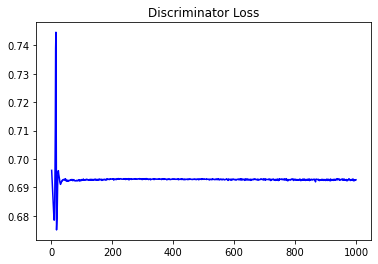

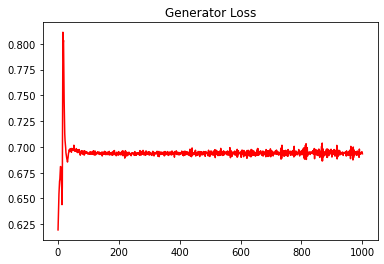

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.036062351057816945


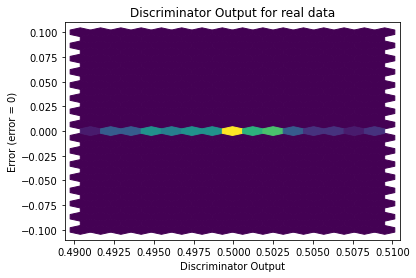

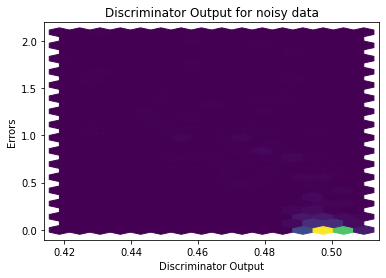

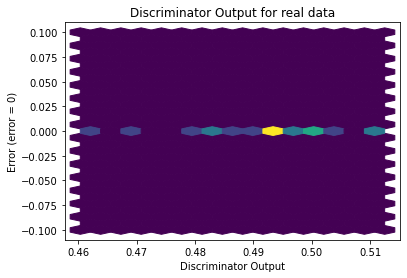

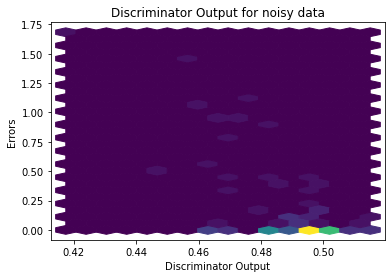

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


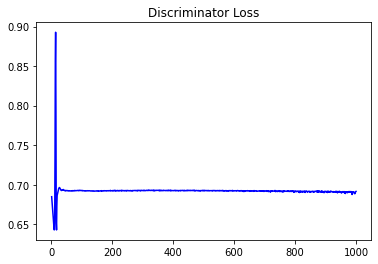

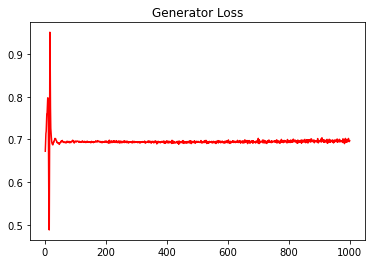

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04339307508438805


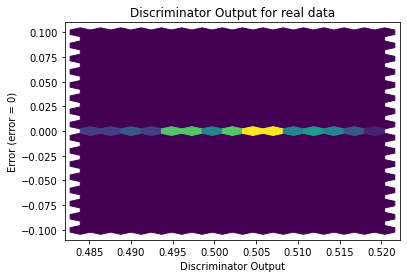

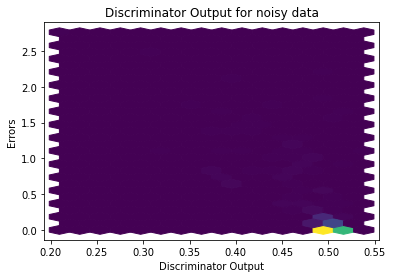

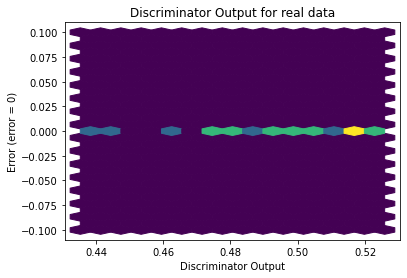

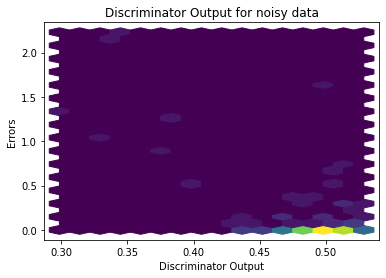

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0738]], requires_grad=True)
